# Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Dataframes

In [2]:
# Define Path
path = r'C:\Users\nickl\Instacart Basket Analysis'

In [3]:
# Import merge.pkl
merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merge.pkl'))

In [4]:
# Check merge shape
merge.shape

(32434212, 29)

In [5]:
# first 5 rows of merge
merge.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...         frequency_flag  First Name  Last Name  Gender  \
0         Soda  ...  Non-frequent customer       Linda     Nguyen  Female   
1         Soda  ...  Non-frequent customer       Linda     Nguyen  Female   
2         Soda  ...  Non-frequent customer       Linda     Nguyen  Female   
3         Soda  ...  Non-frequent customer       Linda     Nguyen  Female   
4         Soda  ...  Non-frequent customer       Linda     Nguyen  Female   

     State Age  Date Joined Dependants   Status income  
0  Alabama  31    2/17/2019          3  married  40423  
1  Alabama  31    2/17/2019          3  married  40423  
2  Alabama  31    2/17/2019          3  married  40423  
3  Alabama  31    2/17/2019          3  married  40423  
4  Alabama  31    2/17/2019          3  married  40423  

[5 rows x 29 columns]

In [6]:
# Check merge info
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   order_dow               int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  max_order               int64   
 15  loyalty_flag            object  
 16  average_price           float64 
 17  spending_flag           object  
 18  median_prior_orders     float64 
 19  frequency_flag          object  
 20  First Name              object  
 21  Last N

# Step 2

## Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

### First and last name are both personal information and needs to be removed for security purposes. 

In [7]:
# Remove "First Name" and "Last Name" columns
merge = merge.drop(columns = ['First Name', 'Last Name'])

In [8]:
merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'max_order', 'loyalty_flag', 'average_price', 'spending_flag',
       'median_prior_orders', 'frequency_flag', 'Gender', 'State', 'Age',
       'Date Joined', 'Dependants', 'Status', 'income'],
      dtype='object')

# Step 3

In [9]:
# Create "Region" column list
region = []

In [10]:
# Add states to region data based on Wikipedia
for value in merge['State']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [11]:
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [12]:
# Add the new "Region" column to merge
merge['Region'] = region

In [13]:
merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'max_order', 'loyalty_flag', 'average_price', 'spending_flag',
       'median_prior_orders', 'frequency_flag', 'Gender', 'State', 'Age',
       'Date Joined', 'Dependants', 'Status', 'income', 'Region'],
      dtype='object')

In [14]:
merge.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  median_prior_orders         frequency_flag  Gender  \
0         Soda  ...                 30.0  Non-frequent customer  Female   
1         Soda  ...                 30.0  Non-frequent customer  Female   
2         Soda  ...                 30.0  Non-frequent customer  Female   
3         Soda  ...                 30.0  Non-frequent customer  Female   
4         Soda  ...                 30.0  Non-frequent customer  Female   

     State  Age Date Joined  Dependants   Status  income Region  
0  Alabama   31   2/17/2019           3  married   40423  South  
1  Alabama   31   2/17/2019           3  married   40423  South  
2  Alabama   31   2/17/2019           3  married   40423  South  
3  Alabama   31   2/17/2019           3  married   40423  South  
4  Alabama   31   2/17/2019           3  married   40423  South  

[5 rows x 28 columns]

## Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [15]:
# Create crosstab with spending flag between different regions

region_spending_crosstab = pd.crosstab(merge['Region'], merge['spending_flag'], dropna = False) 

In [16]:
# Crosstab region spending
region_spending_crosstab

spending_flag  High spender  Low spender
Region                                  
Midwest             7596096         7714
Northeast           5722788         5559
South              10791721         9889
West                8292030         8415

# Step 4

## The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders)
merge.loc[merge['max_order'] < 5, 'low_order_flag'] = 'Low Activity Customer'

In [18]:
# Create an exclusion flag for high-activity customers (customers with more than 5 orders)
merge.loc[merge['max_order'] >= 5, 'low_order_flag'] = 'High Activity Customer'

In [19]:
# Customer activity value counts
merge['low_order_flag'].value_counts(dropna = False)

High Activity Customer    30992664
Low Activity Customer      1441548
Name: low_order_flag, dtype: int64

In [20]:
# Sample to save on CPU memory
merge = merge[:1000000]

In [21]:
# Making a sample with high-activity customers only
merge_high_activity_customers = merge[merge['low_order_flag'] == 'High Activity Customer']

In [22]:
# Export the sample
merge_high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_high_activity.pkl'))

In [23]:
merge_high_activity_customers.shape

(980055, 29)

# Step 5

## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

# Age

In [24]:
# Create an Age Profile - Child < 12
merge_high_activity_customers.loc[merge_high_activity_customers['Age'] <= 12, 'Age Profile'] = 'Child'

C:\Users\nickl\AppData\Local\Temp\ipykernel_1440\1962047446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_high_activity_customers.loc[merge_high_activity_customers['Age'] <= 12, 'Age Profile'] = 'Child'


In [25]:
# Create an Age Profile - Teen 13 to 17
merge_high_activity_customers.loc[(merge_high_activity_customers['Age'] >= 13) & (merge_high_activity_customers['Age'] <= 17), 'Age Profile'] = 'Teen'

In [26]:
# Create an Age Profile - Young Adult 18 to 35
merge_high_activity_customers.loc[(merge_high_activity_customers['Age'] >= 18) & (merge_high_activity_customers['Age'] <= 35), 'Age Profile'] = 'Young Adult'

In [27]:
# Create an Age Profile - Adult 36 to 64
merge_high_activity_customers.loc[(merge_high_activity_customers['Age'] >= 36) & (merge_high_activity_customers['Age'] <= 64), 'Age Profile'] = 'Adult'

In [28]:
# Create an Age Profile - Old Adult >= 65
merge_high_activity_customers.loc[merge_high_activity_customers['Age'] >= 65, 'Age Profile'] = 'Old Adult'

In [29]:
merge_high_activity_customers.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  Gender    State  Age Date Joined  Dependants   Status  \
0         Soda  ...  Female  Alabama   31   2/17/2019           3  married   
1         Soda  ...  Female  Alabama   31   2/17/2019           3  married   
2         Soda  ...  Female  Alabama   31   2/17/2019           3  married   
3         Soda  ...  Female  Alabama   31   2/17/2019           3  married   
4         Soda  ...  Female  Alabama   31   2/17/2019           3  married   

   income Region          low_order_flag  Age Profile  
0   40423  South  High Activity Customer  Young Adult  
1   40423  South  High Activity Customer  Young Adult  
2   40423  South  High Activity Customer  Young Adult  
3   40423  South  High Activity Customer  Young Adult  
4   40423  South  High Activity Customer  Young Adult  

[5 rows x 30 columns]

In [30]:
# Check age frequency
merge_high_activity_customers['Age Profile'].value_counts(dropna = False)

Adult          427097
Young Adult    281340
Old Adult      271618
Name: Age Profile, dtype: int64

# Income

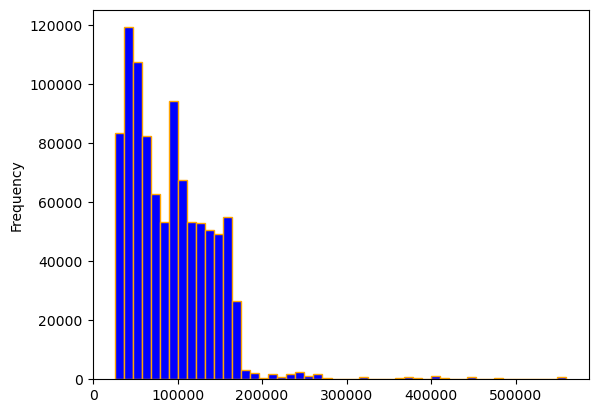

In [31]:
# Histogram of customer income

hist_customer_income = merge_high_activity_customers['income'].plot.hist(bins = 50, color = ['blue'], ec = 'orange')

In [38]:
# Create Income Profile - Low-income <=50,000
merge_high_activity_customers.loc[merge_high_activity_customers['income'] <= 50000, 'Income Profile'] = 'Low-income'

In [39]:
# Create Income Profile - Mid-income 50,001 to 75,000
merge_high_activity_customers.loc[(merge_high_activity_customers['income'] >= 50001) & (merge_high_activity_customers['income'] <= 75000), 'Income Profile'] = 'Middle-income'

In [40]:
# Create Income Profile - High-income 75,001 to 120,000
merge_high_activity_customers.loc[(merge_high_activity_customers['income'] >= 75001) & (merge_high_activity_customers['income'] <= 120000), 'Income Profile'] = 'High-income'

In [41]:
# Create Income Profile - Very-High-income >120,000
merge_high_activity_customers.loc[merge_high_activity_customers['income'] > 120000, 'Income Profile'] = 'Low-income'

In [42]:
merge_high_activity_customers.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...    State  Age  Date Joined Dependants   Status income  \
0         Soda  ...  Alabama   31    2/17/2019          3  married  40423   
1         Soda  ...  Alabama   31    2/17/2019          3  married  40423   
2         Soda  ...  Alabama   31    2/17/2019          3  married  40423   
3         Soda  ...  Alabama   31    2/17/2019          3  married  40423   
4         Soda  ...  Alabama   31    2/17/2019          3  married  40423   

   Region          low_order_flag  Age Profile Income Profile  
0   South  High Activity Customer  Young Adult     Low-income  
1   South  High Activity Customer  Young Adult     Low-income  
2   South  High Activity Customer  Young Adult     Low-income  
3   South  High Activity Customer  Young Adult     Low-income  
4   South  High Activity Customer  Young Adult     Low-income  

[5 rows x 31 columns]

In [43]:
# Check income frequency
merge_high_activity_customers['Income Profile'].value_counts(dropna = False)

Low-income       495678
High-income      274781
Middle-income    209596
Name: Income Profile, dtype: int64

# Department

### Customers will be labeled as either "Vegan" or "Non-Vegan"

In [45]:
# Creating a crosstab between Department_ID and User_ID
dep_crosstab = pd.crosstab(merge_high_activity_customers['department_id'], merge_high_activity_customers['user_id'], dropna = False)

In [47]:
# Assign nutrition flags as Vegan or Non-Vegan
vegan_dict = dict()
for user in dep_crosstab:
    workinglist = dep_crosstab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [48]:
# Assign "vegan_flag"
vegan_flag = []
for user in merge_high_activity_customers['user_id']:
    vegan_flag.append(vegan_dict[user])

In [51]:
# Add vegan_flag to merge_high_activity_customers as Vegan_profile
merge_high_activity_customers['Vegan Profile'] = vegan_flag

C:\Users\nickl\AppData\Local\Temp\ipykernel_1440\2351310132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_high_activity_customers['Vegan Profile'] = vegan_flag


In [52]:
# First 5 rows of merge_high_activity_customers
merge_high_activity_customers.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  Age  Date Joined  Dependants   Status  income Region  \
0         Soda  ...   31    2/17/2019           3  married   40423  South   
1         Soda  ...   31    2/17/2019           3  married   40423  South   
2         Soda  ...   31    2/17/2019           3  married   40423  South   
3         Soda  ...   31    2/17/2019           3  married   40423  South   
4         Soda  ...   31    2/17/2019           3  married   40423  South   

           low_order_flag  Age Profile  Income Profile Vegan Profile  
0  High Activity Customer  Young Adult      Low-income     Non-vegan  
1  High Activity Customer  Young Adult      Low-income     Non-vegan  
2  High Activity Customer  Young Adult      Low-income     Non-vegan  
3  High Activity Customer  Young Adult      Low-income     Non-vegan  
4  High Activity Customer  Young Adult      Low-income     Non-vegan  

[5 rows x 32 columns]

In [53]:
# Check Vegan frequency
merge_high_activity_customers['Vegan Profile'].value_counts(dropna = False)

Non-vegan    935954
Vegan         44101
Name: Vegan Profile, dtype: int64

# Family status and number of dependants

In [54]:
# Check "Status" frequency
merge_high_activity_customers['Status'].value_counts(dropna = False)

married                             689701
single                              154093
divorced/widowed                     89111
living with parents and siblings     47150
Name: Status, dtype: int64

In [55]:
# Create crosstab for "Dependants" and "Status"
family_crosstab = pd.crosstab(merge_high_activity_customers['Status'], merge_high_activity_customers['Dependants'], dropna = False)

In [56]:
# Check family_crosstab
family_crosstab

Dependants                             0       1       2       3
Status                                                          
divorced/widowed                   89111       0       0       0
living with parents and siblings       0   16744   15421   14985
married                                0  229744  230546  229411
single                            154093       0       0       0

In [59]:
# Creating "Married, no children/dependants" - Married + 0 Children/Dependants
merge_high_activity_customers.loc[(merge_high_activity_customers['Status'] == 'married') & (merge_high_activity_customers['Dependants'] == 0), 'Family Profile'] = 'Married, no children/dependants'

In [60]:
# Creating "Married, with children/dependants" - Married + >=1 Children/Dependants
merge_high_activity_customers.loc[(merge_high_activity_customers['Status'] == 'married') & (merge_high_activity_customers['Dependants'] >= 1), 'Family Profile'] = 'Married, with children/dependants'

In [61]:
# Creating "Not Married, no children/dependants" - Not Married + 0 Children/Dependants
merge_high_activity_customers.loc[(merge_high_activity_customers['Status'] != 'married') & (merge_high_activity_customers['Dependants'] == 0), 'Family Profile'] = 'Not Married, no children/dependants'

In [62]:
# Creating "Not Married, with children/dependants" - Not Married + >=1 Children/Dependants
merge_high_activity_customers.loc[(merge_high_activity_customers['Status'] != 'married') & (merge_high_activity_customers['Dependants'] >= 1), 'Family Profile'] = 'Not Married, with children/dependants'

In [63]:
merge_high_activity_customers.head()

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  Date Joined  Dependants   Status income  Region  \
0         Soda  ...    2/17/2019           3  married  40423   South   
1         Soda  ...    2/17/2019           3  married  40423   South   
2         Soda  ...    2/17/2019           3  married  40423   South   
3         Soda  ...    2/17/2019           3  married  40423   South   
4         Soda  ...    2/17/2019           3  married  40423   South   

           low_order_flag  Age Profile Income Profile  Vegan Profile  \
0  High Activity Customer  Young Adult     Low-income      Non-vegan   
1  High Activity Customer  Young Adult     Low-income      Non-vegan   
2  High Activity Customer  Young Adult     Low-income      Non-vegan   
3  High Activity Customer  Young Adult     Low-income      Non-vegan   
4  High Activity Customer  Young Adult     Low-income      Non-vegan   

                      Family Profile  
0  Married, with children/dependants  
1  Married, with children/dependants  
2  Married, with children/dependants  
3  Married, with children/dependants  
4  Married, with children/dependants  

[5 rows x 33 columns]

In [64]:
# Check "Family Profile" frequency
merge_high_activity_customers['Family Profile'].value_counts(dropna = False)

Married, with children/dependants        689701
Not Married, no children/dependants      243204
Not Married, with children/dependants     47150
Name: Family Profile, dtype: int64

# Step 6

## Create an appropriate visualization to show the distribution of profiles.

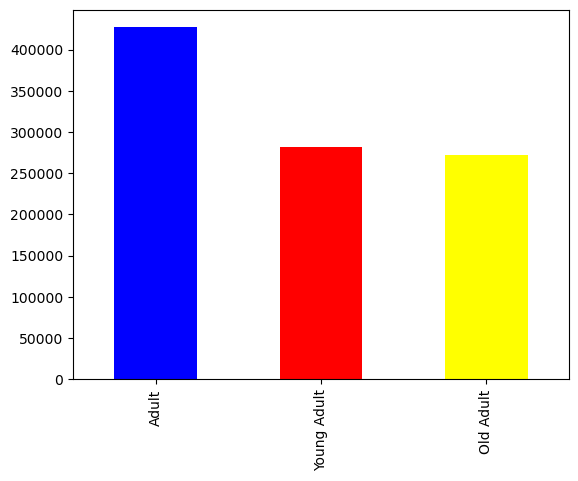

In [72]:
# Age
age_profile_bar = merge_high_activity_customers['Age Profile'].value_counts(dropna = False).plot.bar(color = ['blue', 'red', 'yellow'])

In [73]:
# Exporting outside of jupyter in image file
age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

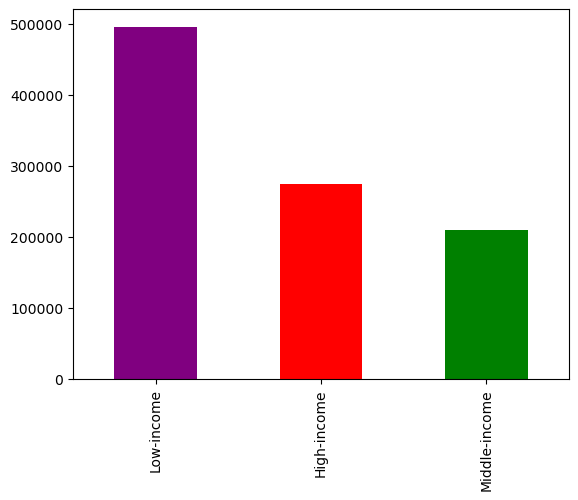

In [74]:
# Income
income_profile_bar = merge_high_activity_customers['Income Profile'].value_counts(dropna = False).plot.bar(color = ['purple', 'red', 'green'])

In [75]:
# Exporting outside of jupyter in image file
income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

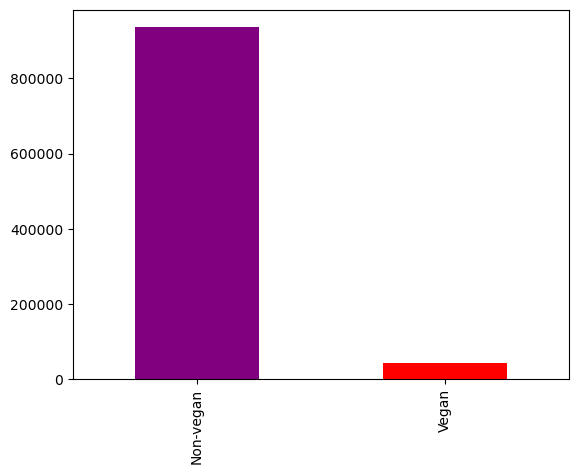

In [82]:
# Vegan or Non-Vegan
vegan_profile_bar = merge_high_activity_customers['Vegan Profile'].value_counts(dropna = False).plot.bar(color = ['purple', 'red'])

In [83]:
# Exporting outside of jupyter in image file
vegan_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_profile_bar.png'))

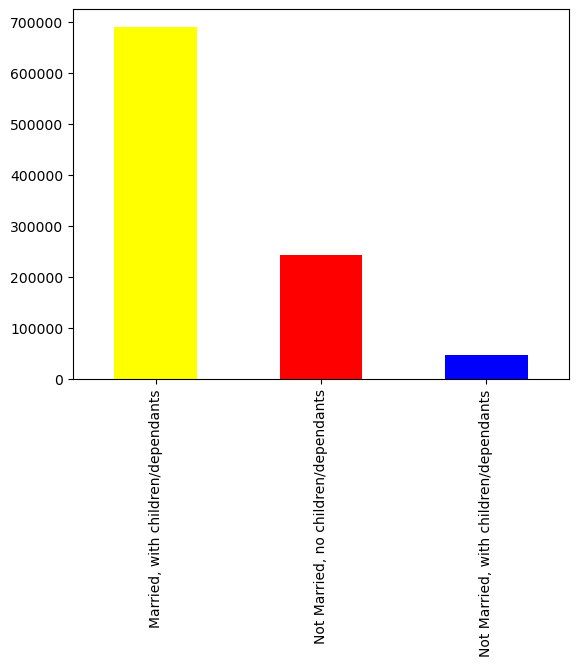

In [85]:
# Family Status
family_profile_bar = merge_high_activity_customers['Family Profile'].value_counts(dropna = False).plot.bar(color = ['yellow', 'red', 'blue'])

In [86]:
# Exporting outside of jupyter in image file
family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

# Step 7

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [88]:
# Stats for Age Profile
merge_high_activity_customers.groupby('Age Profile').agg({'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_prior_order                  prices                    
                               min       mean   max    min       mean      max
Age Profile                                                                   
Adult                          0.0  10.092011  30.0    1.0  12.865220  99999.0
Old Adult                      0.0   9.889555  30.0    1.0  15.997273  99999.0
Young Adult                    0.0   9.929938  30.0    1.0  22.582394  99999.0

In [89]:
# Stats for Income Profile
merge_high_activity_customers.groupby('Income Profile').agg({'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_prior_order                  prices             \
                                  min       mean   max    min       mean   
Income Profile                                                             
High-income                       0.0  10.252433  30.0    1.0  10.080362   
Low-income                        0.0   9.915315  30.0    1.0  23.841615   
Middle-income                     0.0   9.820225  30.0    1.0   7.660065   

                         
                    max  
Income Profile           
High-income     99999.0  
Low-income      99999.0  
Middle-income   14900.0

In [90]:
# Stats for Vegan Profile
merge_high_activity_customers.groupby('Vegan Profile').agg({'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_prior_order                  prices             \
                                 min       mean   max    min       mean   
Vegan Profile                                                             
Non-vegan                        0.0   9.823310  30.0    1.0  16.991879   
Vegan                            0.0  13.592861  30.0    1.0   6.565783   

                        
                   max  
Vegan Profile           
Non-vegan      99999.0  
Vegan             15.0

In [91]:
# Stats for Family Status Profile
merge_high_activity_customers.groupby('Family Profile').agg({'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})

days_since_prior_order                   \
                                                         min       mean   max   
Family Profile                                                                  
Married, with children/dependants                        0.0  10.026190  30.0   
Not Married, no children/dependants                      0.0   9.912222  30.0   
Not Married, with children/dependants                    0.0   9.845993  30.0   

                                      prices                      
                                         min       mean      max  
Family Profile                                                    
Married, with children/dependants        1.0  14.931864  99999.0  
Not Married, no children/dependants      1.0  20.759492  99999.0  
Not Married, with children/dependants    1.0  17.939809  99999.0

# Step 8

## Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Age

In [94]:
# Create crosstab comparing "Age Profile" and "Region"
age_region_cross = pd.crosstab(merge_high_activity_customers['Age Profile'], merge_high_activity_customers['Region'], dropna = False, normalize = 'columns')

In [95]:
# Check age_region_cross
age_region_cross

Region        Midwest  Northeast     South      West
Age Profile                                         
Adult        0.444536   0.407455  0.438922  0.445163
Old Adult    0.242526   0.274166  0.296257  0.283157
Young Adult  0.312938   0.318378  0.264820  0.271680

#### Adult leads every region. Each age profile stays consistant among the different regions

### Income

In [96]:
# Create crosstab comparing "Income Profile" and "Region"
income_region_cross = pd.crosstab(merge_high_activity_customers['Income Profile'], merge_high_activity_customers['Region'], dropna = False, normalize = 'columns')

In [97]:
# Check income_region_cross
income_region_cross

Region           Midwest  Northeast     South      West
Income Profile                                         
High-income     0.273678   0.269585  0.293311  0.276211
Low-income      0.472471   0.515054  0.513152  0.517876
Middle-income   0.253851   0.215361  0.193537  0.205913

#### Low income leads in every region. Each income profile stays consistant among the different regions

### Vegan / Non-Vegan

In [98]:
# Create crosstab comparing "Vegan Profile" and "Region"
vegan_region_cross = pd.crosstab(merge_high_activity_customers['Vegan Profile'], merge_high_activity_customers['Region'], dropna = False, normalize = 'columns')

In [99]:
# Check vegan_region_cross
vegan_region_cross

Region          Midwest  Northeast     South      West
Vegan Profile                                         
Non-vegan      0.950719   0.956556  0.956991  0.954809
Vegan          0.049281   0.043444  0.043009  0.045191

#### Large majority in each region is Non-Vegan

### Family Status

In [100]:
# Create crosstab comparing "Family Profile" and "Region"
family_region_cross = pd.crosstab(merge_high_activity_customers['Family Profile'], merge_high_activity_customers['Region'], dropna = False, normalize = 'columns')

In [101]:
# Check family_region_cross
family_region_cross

Region                                  Midwest  Northeast     South      West
Family Profile                                                                
Married, with children/dependants      0.697959   0.679922  0.711870  0.715517
Not Married, no children/dependants    0.238189   0.265320  0.251869  0.238664
Not Married, with children/dependants  0.063852   0.054758  0.036261  0.045819

#### Married, with children/dependants has a large majority in each region. 

In [103]:
# Export merge_high_activity_customers as .pkl
merge_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merge_high_activity_customers.pkl'))